# Logistic Regression

In [15]:
import sklearn.datasets as sk_datasets
import sklearn.preprocessing as sk_preprocessing
import sklearn.linear_model as sk_linear_model
import sklearn.metrics as sk_metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn.over_sampling as imb_over_sampling

Load and examine the iris dataset.

In [16]:
df = sk_datasets.load_breast_cancer(as_frame=True).frame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [17]:
for unique_target in df.target.unique():
    print(f"Target {unique_target} has {df[df.target == unique_target].shape[0]} samples")

Target 0 has 212 samples
Target 1 has 357 samples


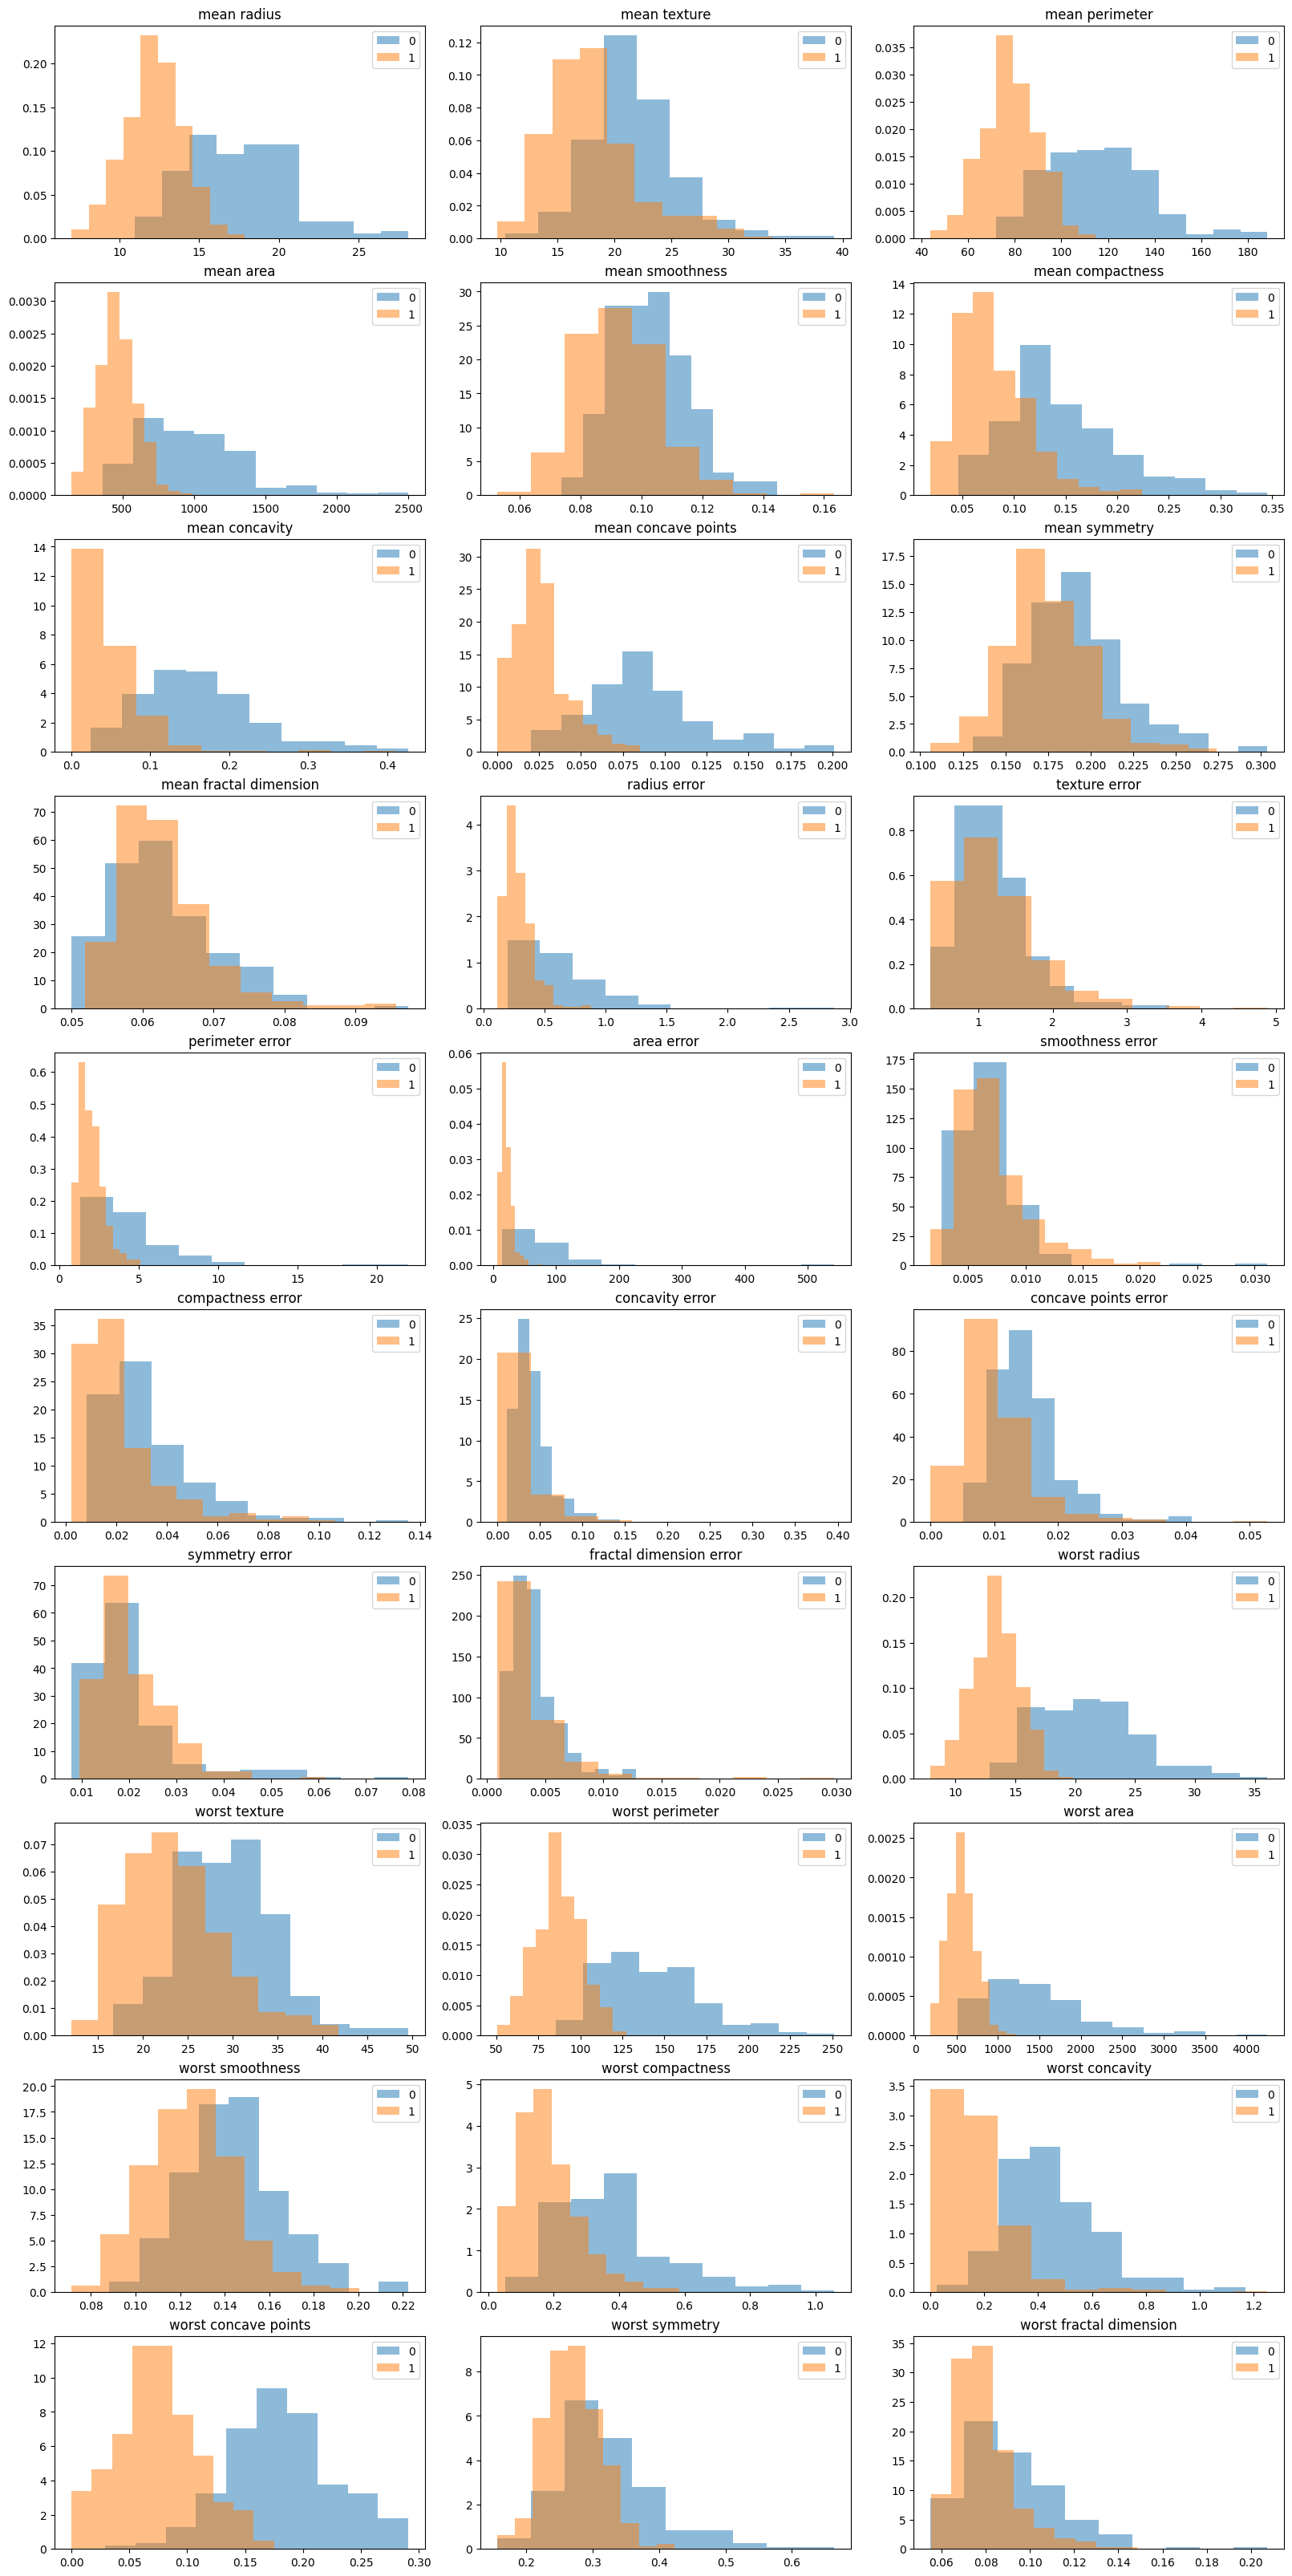

In [18]:
unique_labels = df['target'].unique()
features = df.columns[:-1]

fig, axs = plt.subplots(ncols=3, nrows=10, figsize=(16, 32), layout='constrained')

for i, label in enumerate(features):
    axis = axs[i // 3][i % 3]
    for unique_label in unique_labels:
        axis.hist(df[label][df['target'] == unique_label], alpha=0.5, label=unique_label, density=True)
    axis.set_title(label)
    axis.legend()

plt.show()

Transform and prepare data.

In [19]:
train, test = np.split(df.sample(frac=1), [int(.8*len(df))])

/Users/philipcastiglione/.asdf/installs/python/3.12.2/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [20]:
def scale_dataset(dataframe: pd.DataFrame, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe['target'].values

    scaler = sk_preprocessing.StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = imb_over_sampling.RandomOverSampler()

        X, y = ros.fit_resample(X, y)
    
    data = np.hstack((X, y.reshape(-1, 1)))

    return data, X, y

In [21]:
train, X_train, y_train = scale_dataset(train, oversample=True)
test, X_test, y_test = scale_dataset(test)

In [22]:
lr_model = sk_linear_model.LogisticRegression()
lr_model = lr_model.fit(X_train, y_train)

In [23]:
y_pred = lr_model.predict(X_test)
print(sk_metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        46
           1       0.96      1.00      0.98        68

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

